#### Vocabulary

**Present Value** := The amount needed presently to match a unit of value 1 year into the future at an interest rate $i$. The algebraic form of this term, often denoted $v$ in actuarial notation is $v=\frac{1}{1+i}$

* Note that the present value factor is important in the context of compound interest: $A(t) = A(0)(1+i)^t \to A(0) = \frac{A(t)}{(1+i)^t} = A(t)v^t$. \
Hence $Kv^t$ is the present value at time $0$ of an amount $K$ due at time $t$ when investment growth occurs according to compound interest. In other words $Kv^t$ is the amount that \
must be invested at time $0$ to grow to $K$ at time $t$. Furthermore, consider that Accumulation and present value share an inverse relationship.

* The notion of **present value** based on any accumulation value $A(t)$ can be generalized as follows. Suppose an investment grows from amount \
$A(t_1)$ to $A(t_2)$ where $t_1 \lt t_2$. Then it follows that an amount of $\frac{A(t_1)}{A(t_2)}$ invested at time $t_1$ will grow to amount $1$ at time $t_2$. In other words,
$\frac{A(t_1)}{A(t_2)}$ is a generalized present value factor from time $t_2$ back to time $t_1$

---
#### FUNCTIONS

In [ ]:
def calculate_present_value(i):
    return 1/(1+i)


---
#### GRAPHS

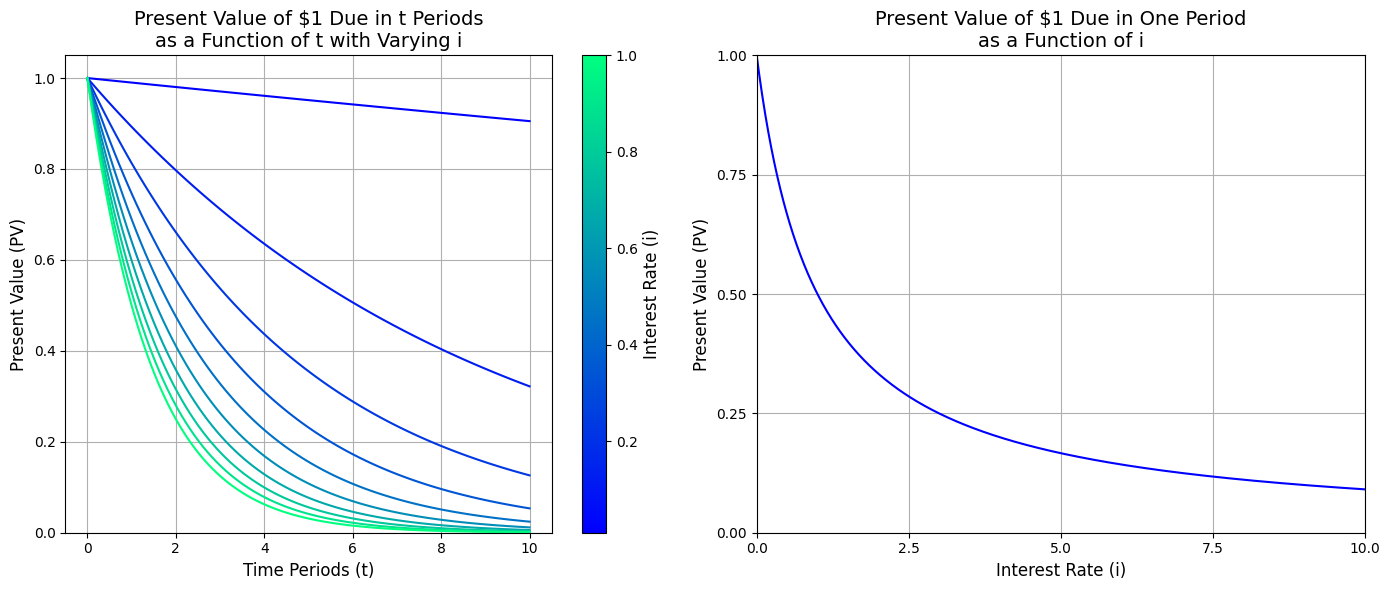

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# Data Preparation

# Time periods from 0 to 10, with 100 points
T = np.linspace(0, 10, 100)
T = T[np.newaxis, :]  # Reshape for broadcasting, shape becomes (1, 100)

# Discrete interest rates from 1% to 15%, with 10 rates
I_discrete = np.linspace(0.01, 1, 10)
I_discrete = I_discrete[:, np.newaxis]  # Reshape for broadcasting, shape becomes (10, 1)

# Continuous interest rates from 0% to 20%, with 1000 points
I_continuous = np.linspace(0, 10, 1000)

# Calculations

# Present Value over time for varying interest rates
A_t = 1 / (1 + I_discrete) ** T  # Shape (10, 100)

# Present Value for one period as a function of interest rates
A_i = 1 / (1 + I_continuous)  # Shape (1000,)

# Normalize the interest rates for the colormap
norm = mcolors.Normalize(vmin=I_discrete.min(), vmax=I_discrete.max())

# Choose a colormap
cmap = cm.winter

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

### First Plot: Present Value over Time with Varying Interest Rates

# Plot A_t vs. T for each interest rate in I_discrete
for idx, i in enumerate(I_discrete.flatten()):
    color = cmap(norm(i))  # Map interest rate to a color
    axs[0].plot(T.flatten(), A_t[idx], color=color, label=f'i = {i:.1%}')

# Customization for the first plot
axs[0].set_title("Present Value of $1 Due in t Periods\nas a Function of t with Varying i", fontsize=14)
axs[0].set_xlabel('Time Periods (t)', fontsize=12)
axs[0].set_ylabel('Present Value (PV)', fontsize=12)
axs[0].set_ylim(0, 1.05)
axs[0].grid(True)

# Add a colorbar to represent interest rates
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=axs[0])
cbar.set_label('Interest Rate (i)', fontsize=12)

### Second Plot: Present Value as a Function of Interest Rates

axs[1].plot(I_continuous, A_i, color='blue')

# Customization for the second plot
axs[1].set_title("Present Value of $1 Due in One Period\nas a Function of i", fontsize=14)
axs[1].set_xlabel('Interest Rate (i)', fontsize=12)
axs[1].set_ylabel('Present Value (PV)', fontsize=12)
axs[1].set_xlim(0, 0.2)
axs[1].set_ylim(0.8, 1.0)
axs[1].grid(True)
axs[1].set_xticks(np.linspace(0, 10, 5))
axs[1].set_yticks(np.linspace(0.0, 1, 5))

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
